# Matching images using local descriptors

In [ ]:
import numpy as np 
import cv2 as cv
from matplotlib import pyplot as plt

#load images
img = cv.imread('empire.jpg')
img_45 = cv. imread('empire_45.jpg')
img_zoomedout = cv.imread('empire_zoomedout.jpg')
img_another = cv.imread('fisherman.jpg')

#convert the images to grayscale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_45_gray = cv.cvtColor(img_45, cv.COLOR_BGR2GRAY)
img_zoomedout_gray = cv.cvtColor(img_zoomedout, cv.COLOR_BGR2GRAY)
img_another_gray = cv.cvtColor(img_another, cv.COLOR_BGR2GRAY)


In [9]:
# initialize SIFT
sift = cv.SIFT_create()

#extract keypoints and descriptors
kp, des = sift.detectAndCompute(img_gray, None)
kp_45, des_45 = sift.detectAndCompute(img_45_gray, None)
kp_zoomedout, des_zoomedout = sift.detectAndCompute(img_zoomedout_gray, None)
kp_another, des_another = sift.detectAndCompute(img_another_gray, None)

# Use Brute-Force to match keypoints between images

In [ ]:
#Initialize a brute forece matcher with default params
bf = cv.BFMatcher()
train = des_45
query = des
matches_des_des_45 = bf.match(query, train)

matches_des_des_45 = sorted(matches_des_des_45, key = lambda x:x.distance)

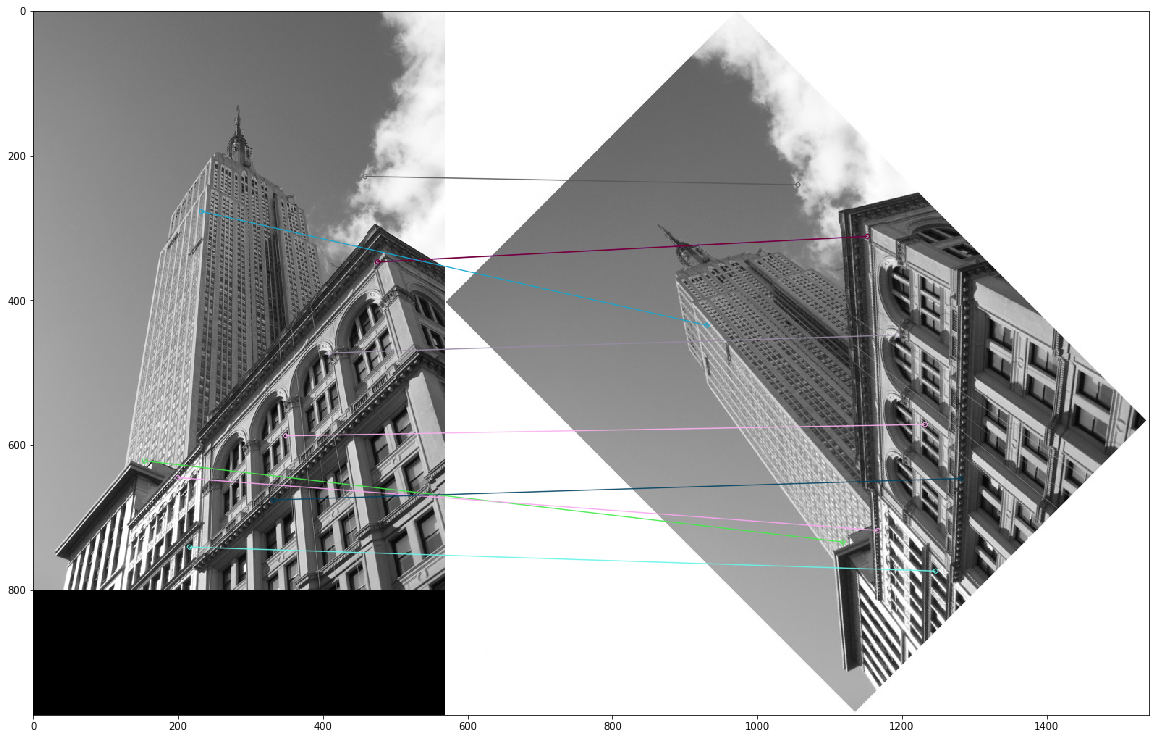

In [24]:
# Draw the best 10 matches.
nBestMatches = 10
matching_des_des_45 = cv.drawMatches(img_gray, kp, img_45_gray, kp_45,matches_des_des_45[:nBestMatches],None, flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(20,20))
plt.imshow(matching_des_des_45, interpolation='nearest')

match  0 info
	distance: 9.380831718444824
	keypoint in train: ID: 2443  x: 677.6953125 y: 773.8290405273438
	keypoint in query: ID: 661  x: 215.93624877929688 y: 740.7075805664062
match  1 info
	distance: 9.69536018371582
	keypoint in train: ID: 2356  x: 663.0458984375 y: 571.4856567382812
	keypoint in query: ID: 1721  x: 348.70166015625 y: 587.2408447265625
match  2 info
	distance: 11.747340202331543
	keypoint in train: ID: 963  x: 487.35565185546875 y: 240.7156524658203
	keypoint in query: ID: 2328  x: 458.2903137207031 y: 229.1184844970703
match  3 info
	distance: 12.206555366516113
	keypoint in train: ID: 2080  x: 624.6529541015625 y: 447.94830322265625
	keypoint in query: ID: 2090  x: 408.8612060546875 y: 472.7430419921875
match  4 info
	distance: 12.961481094360352
	keypoint in train: ID: 1525  x: 549.5103759765625 y: 733.6979370117188
	keypoint in query: ID: 101  x: 153.57798767089844 y: 621.6637573242188
match  5 info
	distance: 13.0
	keypoint in train: ID: 1753  x: 583.294738

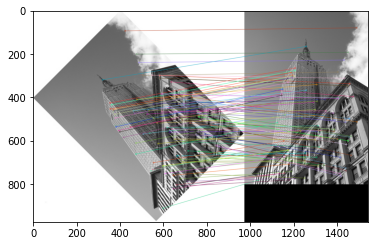

In [13]:
kp_train = kp_45
kp_query = kp
for i in range(0, nBestMatches):
    print("match ", i, "info")
    print("\tdistance:", matches_des_des_45[i].distance)
    print("\tkeypoint in train: ID:", matches_des_des_45[i].trainIdx, " x:", kp_train[matches_des_des_45[i].trainIdx].pt[0], "y:", kp_train[matches_des_des_45[i].trainIdx].pt[1])
    print("\tkeypoint in query: ID:", matches_des_des_45[i].queryIdx, " x:", kp_query[matches_des_des_45[i].queryIdx].pt[0], "y:", kp_query[matches_des_des_45[i].queryIdx].pt[1])

matches_des_45_des = bf.match(des_45, des)
matches_des_45_des = sorted(matches_des_45_des, key = lambda x:x.distance)
matching_des_45_des = cv.drawMatches(img_45_gray, kp_45, img_gray, kp, matches_des_45_des[:nBestMatches], None, flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(matching_des_45_des)


# Sum the distances of these 10 matches of descriptors to get a metric for the similarity between two images

In [27]:
def compute_similarity(input1, input2, N):
    result = 0
    for i in range(0, N):
        result+=input1[i].distance
        result+=input2[i].distance
    result/=2
    return result

N=3
sim_emp_emp45 = compute_similarity(matches_des_des_45, matches_des_45_des, N)
print("Similarity between empire.jpg and empire_45.jpg: ", sim_emp_emp45)

matches_des_zoomedout_des = bf.match(des_zoomedout, des)
matches_des_zoomedout_des = sorted(matches_des_zoomedout_des, key = lambda x:x.distance)
matches_des_des_zoomedout = bf.match(des, des_zoomedout)
matches_des_des_zoomedout = sorted(matches_des_des_zoomedout, key = lambda x:x.distance)
sim_emp_empzoomedout = compute_similarity(matches_des_zoomedout_des, matches_des_des_zoomedout, N)
print("Similarity between empire.jpg and empire_zoomedout.jpg: ", sim_emp_empzoomedout)

matches_des_fisherman_des = bf.match(des_another, des)
matches_des_fisherman_des = sorted(matches_des_fisherman_des, key = lambda x:x.distance)
matches_des_des_fisherman = bf.match(des, des_another)
matches_des_des_fisherman = sorted(matches_des_des_fisherman, key = lambda x:x.distance)
sim_emp_fisherman = compute_similarity(matches_des_fisherman_des, matches_des_des_fisherman, N)
print("Similarity between empire.jpg and fisherman.jpg: ", sim_emp_fisherman)

Similarity between empire.jpg and empire_45.jpg:  30.823532104492188
Similarity between empire.jpg and empire_zoomedout.jpg:  27.94987392425537
Similarity between empire.jpg and fisherman.jpg:  203.0364990234375
